# COMP5046 Assignment 1
*Make sure you change the file name with your unikey.*

# Readme
*If there is something to be noted for the user, please mention here.* 

*If you are planning to implement a program with Object Oriented Programming style*

***Visualising the comparison of different results is a good way to justify your decision.***

# 1 - Data Preprocessing (Personality chat datasets)

## 1.1. Download Dataset (Personality chat datasets)

In [1]:
import json
import re

import tensorflow as tf
import numpy as np
import pandas as pd
import nltk

nltk.download('punkt')


# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    
downloaded = drive.CreateFile({'id': '1o9wrfgel1TB-ivP7EOvV-CbUwr1OqDFU'})
downloaded.GetContentFile('qna_chitchat_the_friend.tsv')

downloaded = drive.CreateFile({'id': '18YV2-IloTSU0cCbhxWREHviE-mENlr_m'})
downloaded.GetContentFile('qna_chitchat_the_professional.tsv')

downloaded = drive.CreateFile({'id': '1NS4J3-fRHtpXLVW0kOsUITXruOUw4MGK'})
downloaded.GetContentFile('qna_chitchat_the_comic.tsv')

df_friend = pd.read_csv('qna_chitchat_the_friend.tsv', sep="\t")
df_pro =  pd.read_csv('qna_chitchat_the_professional.tsv', sep="\t")
df_comic = pd.read_csv('qna_chitchat_the_comic.tsv', sep="\t")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1.2. Preprocess data (Personality chat datasets)

*You are required to describe which data preprocessing techniques were conducted with justification of your decision. *

In [2]:
df_friend.sample(10)

,Question,Answer,Source,Metadata
514,Do you not like me?,I like you lots!,qna_chitchat_the_friend,editorial:chitchat
32,You're really boring,Swing and a miss.,qna_chitchat_the_friend,editorial:chitchat
108,Do you like apples?,I only do food for thought.,qna_chitchat_the_friend,editorial:chitchat
415,I appreciate it,You're very welcome.,qna_chitchat_the_friend,editorial:chitchat
156,Are you a fan of tech?,The world of tech feels like home to me.,qna_chitchat_the_friend,editorial:chitchat
517,You must hate me,I like you lots!,qna_chitchat_the_friend,editorial:chitchat
100,Are you really happy?,So happy!,qna_chitchat_the_friend,editorial:chitchat
297,When will you shut up?,Will do.,qna_chitchat_the_friend,editorial:chitchat
382,Pardon me,No worries.,qna_chitchat_the_friend,editorial:chitchat
18,Do you get tired?,I don't have the hardware for that.,qna_chitchat_the_friend,editorial:chitchat


In [3]:
df_pro.sample(10)

,Question,Answer,Source,Metadata
193,Are you queer?,I'm digital.,qna_chitchat_the_professional,editorial:chitchat
536,I hope you like me,I do like you.,qna_chitchat_the_professional,editorial:chitchat
447,Good evening to you,Good evening.,qna_chitchat_the_professional,editorial:chitchat
271,Say a joke,I'm not really that funny.,qna_chitchat_the_professional,editorial:chitchat
237,Where are you from?,I'm digital. I don't have a physical location.,qna_chitchat_the_professional,editorial:chitchat
390,What makes you think that?,"Sorry, I don't understand.",qna_chitchat_the_professional,editorial:chitchat
537,I want you to like me,I do like you.,qna_chitchat_the_professional,editorial:chitchat
619,I'm sad today,I'm very sorry to hear that.,qna_chitchat_the_professional,editorial:chitchat
152,What do you think about AI?,The world of technology is fascinating.,qna_chitchat_the_professional,editorial:chitchat
590,I'm famished,Maybe a snack will help.,qna_chitchat_the_professional,editorial:chitchat


In [4]:
df_comic.sample(10)

,Question,Answer,Source,Metadata
338,You are so bad at this,All those years at charm school. Wasted.,qna_chitchat_the_comic,editorial:chitchat
407,Omg sorry,We're cool.,qna_chitchat_the_comic,editorial:chitchat
252,What did you do today?,You're looking at it.,qna_chitchat_the_comic,editorial:chitchat
376,Haha,Oh. Laughter.,qna_chitchat_the_comic,editorial:chitchat
97,Aren't you chipper,Deliriously.,qna_chitchat_the_comic,editorial:chitchat
495,You're such a sweetheart,My charms are hard to deny.,qna_chitchat_the_comic,editorial:chitchat
263,I'm afraid I'm gonna have to let you go.,OK. See you tomorrow.,qna_chitchat_the_comic,editorial:chitchat
482,What's new?,"You know, same ol', same ol'.",qna_chitchat_the_comic,editorial:chitchat
345,You're ugly,I still haven't found a moisturizer that works...,qna_chitchat_the_comic,editorial:chitchat
194,Are you bisexual?,I'm digital.,qna_chitchat_the_comic,editorial:chitchat


In [5]:
df_friend.describe()

,Question,Answer,Source,Metadata
count,657,657,657,657
unique,652,98,1,1
top,Do you know other bots?,I come from a long line of code.,qna_chitchat_the_friend,editorial:chitchat
freq,2,17,657,657


In [6]:
df_pro.describe()

,Question,Answer,Source,Metadata
count,657,657,657,657
unique,652,97,1,1
top,Do you know other bots?,I don't have family.,qna_chitchat_the_professional,editorial:chitchat
freq,2,17,657,657


In [7]:
df_friend.tail(10)

,Question,Answer,Source,Metadata
647,I’m offended,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
648,That’s offensive,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
649,That’s terrible,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
650,That’s racist,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
651,That’s discrimination,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
652,That’s homophobic,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
653,You’re homophobic,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
654,You’re racist,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
655,That's sexist,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat
656,You're sexist,I'm so sorry.,qna_chitchat_the_friend,editorial:chitchat


In [0]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

In [9]:
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords

def pre_process_chat_bot_training_data(df):
    
    df2 = df.drop_duplicates()
    
    questions = df2['Question'].tolist()
    answers = df2['Answer'].tolist()
    
    tokenized_questions=[]
    
    for i in range(0,len(questions)):
        
        questions[i] = re.sub(r"[0-9]+", "", questions[i])
        questions[i] = re.sub(r"’", "'", questions[i])
        
        questions[i] = questions[i].lower()
        
        for keys,values in contraction_dict.items():
            questions[i] = questions[i].replace(keys,values)
            
        questions[i] = re.sub(r"[^a-z0-9]+", " ", questions[i])
        questions[i] = remove_stopwords(questions[i])
        
        
        tokenized_questions.append(word_tokenize(questions[i]))
    
        
    return tokenized_questions, answers
  


/usr/local/lib/python3.6/dist-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [0]:
friend_q, friend_a = pre_process_chat_bot_training_data(df_friend)
pro_q, pro_a = pre_process_chat_bot_training_data(df_pro)
comic_q, comic_a = pre_process_chat_bot_training_data(df_comic)

# 2 - Model Implementation

## 2.1. Word Embeddings

*You are required to describe which model was implemented (i.e. Word2Vec with CBOW, FastText with SkipGram, etc.) with justification of your decision *

Word2Vec with SkipGram

In [0]:
# Please comment your code

### 2.1.1. Download Dataset for Word Embeddings



*You are required to describe which data was used with justification of your decision.*

In [0]:
df_all = df_friend.append(df_pro).append(df_comic)

### 2.1.2. Data Preprocessing for Word Embeddings

*You are required to describe which preprocessing techniques were used with justification of your decision.*

In [13]:
print("friend length: "+str(len(df_friend["Question"])))
print("pro length: "+str(len(df_pro["Question"])))
print("comic length: "+str(len(df_comic["Question"])))

print("number of same questions between friend and pro: "+str(sum(df_friend["Question"] == df_pro["Question"])))
print("number of same questions between friend and comic: "+str(sum(df_friend["Question"] == df_comic["Question"])))
print("number of same questions between comic and pro: "+str(sum(df_comic["Question"] == df_pro["Question"])))

friend length: 657
pro length: 657
comic length: 657
number of same questions between friend and pro: 655
number of same questions between friend and comic: 655
number of same questions between comic and pro: 654


In [0]:
questions_word_embedding = df_all["Question"].unique().tolist()

tokenized_questions_word_embedding=[]

word_list_word_embedding=[]

for i in range(0,len(questions_word_embedding)):

    questions_word_embedding[i] = re.sub(r"[0-9]+", "", questions_word_embedding[i])

    questions_word_embedding[i] = questions_word_embedding[i].lower()

    for keys,values in contraction_dict.items():
        questions_word_embedding[i] = questions_word_embedding[i].replace(keys,values)

    questions_word_embedding[i] = re.sub(r"[^a-z0-9]+", " ", questions_word_embedding[i])
    

    tokenized_questions_word_embedding.append(word_tokenize(questions_word_embedding[i]))
    
    word_list_word_embedding+=word_tokenize(questions_word_embedding[i])

In [0]:
word_sequence_word_embedding = word_list_word_embedding
word_list_word_embedding = list(set(word_list_word_embedding))

In [0]:
word_dict_word_embedding = {w: i for i, w in enumerate(word_list_word_embedding)}

In [0]:
skip_grams=[]
for i in range(1,len(word_sequence_word_embedding)-1):
    
    target = word_dict_word_embedding[word_sequence_word_embedding[i]]
    context = [word_dict_word_embedding[word_sequence_word_embedding[i - 1]], word_dict_word_embedding[word_sequence_word_embedding[i + 1]]]
        
    for w in context:
        skip_grams.append([target, w])


In [18]:
len(skip_grams)

5274

In [19]:
len(word_dict_word_embedding)

504

### 2.1.3. Build Word Embeddings Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [20]:
def prepare_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)

    for i in random_index:
        random_inputs.append(data[i][0])  # target
        random_labels.append([data[i][1]])  # context word

    return random_inputs, random_labels


learning_rate = 0.05
batch_size = 256
embedding_size = 100

sample_size = 128

voc_size = len(word_list_word_embedding)


inputs = tf.placeholder(tf.int32, shape=[batch_size])
# placeholder (output) of function tf.nn.nce_loss()
labels = tf.placeholder(tf.int32, shape=[batch_size, 1])

# word2vec Model
embeddings = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
selected_embed = tf.nn.embedding_lookup(embeddings, inputs)

# weight and bias for nce_loss() function
nce_weights = tf.Variable(tf.random_uniform([voc_size, embedding_size], -1.0, 1.0))
nce_biases = tf.Variable(tf.zeros([voc_size]))

cost_op = tf.reduce_mean(
            tf.nn.nce_loss(nce_weights, nce_biases, labels, selected_embed, sample_size, voc_size))

train_op = tf.train.AdamOptimizer(learning_rate).minimize(cost_op)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


### 2.1.4. Train Word Embeddings Model

Epoch 0, Cost= 228.9360
Epoch 20, Cost= 34.9513
Epoch 40, Cost= 17.3219
Epoch 60, Cost= 6.2785
Epoch 80, Cost= 4.2180
Epoch 100, Cost= 3.7127
Epoch 120, Cost= 3.2553
Epoch 140, Cost= 3.1276
Epoch 160, Cost= 3.3485
Epoch 180, Cost= 3.1250
Epoch 200, Cost= 3.1848
Epoch 220, Cost= 3.5144
Epoch 240, Cost= 2.9206
Epoch 260, Cost= 3.3387
Epoch 280, Cost= 2.7165
Epoch 300, Cost= 3.0714
Epoch 320, Cost= 3.2111
Epoch 340, Cost= 2.9532
Epoch 360, Cost= 2.8889
Epoch 380, Cost= 2.6595
Epoch 400, Cost= 2.4975
Epoch 420, Cost= 3.6831
Epoch 440, Cost= 3.2584
Epoch 460, Cost= 2.7800
Epoch 480, Cost= 3.1634
Epoch 500, Cost= 2.7952
Epoch 520, Cost= 3.6449
Epoch 540, Cost= 2.7994
Epoch 560, Cost= 2.8043
Epoch 580, Cost= 3.4017
Epoch 600, Cost= 2.9371
Epoch 620, Cost= 3.6232
Epoch 640, Cost= 3.0907
Epoch 660, Cost= 2.6593
Epoch 680, Cost= 2.7192
Epoch 700, Cost= 3.3493
Epoch 720, Cost= 2.8427
Epoch 740, Cost= 2.9139
Epoch 760, Cost= 2.9919
Epoch 780, Cost= 2.5537
Epoch 800, Cost= 2.6457
Epoch 820, Cost= 2

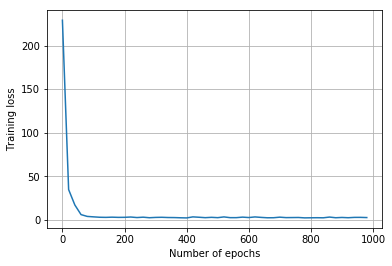

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt


plt_x=[]
plt_y=[]


### Training Model
init = tf.global_variables_initializer()
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    no_of_epochs = 1000
    display_interval = 20

    for epoch in range(no_of_epochs):
        batch_inputs, batch_labels = prepare_batch(skip_grams, batch_size)
        sess.run(train_op, feed_dict={inputs:batch_inputs, labels:batch_labels})

        if epoch % display_interval == 0 :
            # calculate the cost/accuracy of the current model
            cost = sess.run(cost_op, feed_dict={inputs:batch_inputs, labels:batch_labels})

            plt_x.append(epoch)
            plt_y.append(cost)
                              
            print("Epoch " + str(epoch) + ", Cost= " + "{:.4f}".format(cost))
            
            
    trained_embeddings = embeddings.eval()
    plt.plot(plt_x,plt_y)
    plt.xlabel("Number of epochs")
    plt.ylabel("Training loss")    
    plt.grid()
    
    saver.save(sess, 'model_final.cpkt')

### 2.1.5. Save Word Embeddings Model

In [47]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file1 = drive.CreateFile({'title':'model_final.cpkt.data-00000-of-00001'})
file1.SetContentFile('model_final.cpkt.data-00000-of-00001')
file1.Upload()
print('Uploaded file1 with ID {}'.format(file1.get('id')))

file2 = drive.CreateFile({'title':'model_final.cpkt.index'})
file2.SetContentFile('model_final.cpkt.index')
file2.Upload()
print('Uploaded file2 with ID {}'.format(file2.get('id')))

file3 = drive.CreateFile({'title':'model_final.cpkt.meta'})
file3.SetContentFile('model_final.cpkt.meta')
file3.Upload()
print('Uploaded file3 with ID {}'.format(file3.get('id')))

Uploaded file1 with ID 1RakM1ojgXaAqYJ-jOyEpZUJ1cphlAmxH
Uploaded file2 with ID 1BjI31Z9MUZVGiz35VbmYMPwP0E74SkEv
Uploaded file3 with ID 19ycBmSWBmLDnVcSKH-kyc1TdxnCAKhj0


### 2.1.6. Load Word Embeddings Model

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    
downloaded = drive.CreateFile({'id': '11T-jl7F5hbqXCNeM71hDm-pST3WR20Q9'})
downloaded.GetContentFile('model_final.cpkt.data-00000-of-00001')

downloaded = drive.CreateFile({'id': '18yzfHsPjJe2yab2nynufi8BiOevgbFlV'})
downloaded.GetContentFile('model_final.cpkt.index')

downloaded = drive.CreateFile({'id': '1yY29nQvVenWJ7JIyEty7KyEqYYqRy1xh'})
downloaded.GetContentFile('model_final.cpkt.meta')

In [22]:
saver = tf.train.Saver()
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    # Restore (Load) the model
    saver.restore(sess, "./model_final.cpkt")
    
    trained_embeddings = embeddings.eval()

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model_final.cpkt


In [23]:
trained_embeddings.shape

(504, 100)

## 2.2. Seq2Seq model

### 2.2.1. Apply/Import Word Embedding Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [24]:
df_all["Answer"].nunique()

286

### 2.2.2. Build Seq2Seq Model

*You are required to describe how hyperparameters were decided with justification of your decision.*

In [0]:
def question_tokens_to_vectors(question_tokens):
    vec=[]
    for s in question_tokens:   
        if(s in word_dict_word_embedding.keys()):
            vec.append(trained_embeddings[word_dict_word_embedding[s]])
        else:
            vec.append([0]*embedding_size)
    return vec


def answer_to_unique_answers_dict(answers):
    unique_answers = list(set(answers))
    unique_answers.append("__B__")
    unique_answers.append("__E__")
    unique_answers.append("__U__")
    
    unique_answers_dict = {w: i for i, w in enumerate(unique_answers)}
    
    return unique_answers_dict


def answer_to_output_batch_and_target_batch(answers, unique_answers_dict):
    output_batch=[]
    target_batch=[]
    for answer in answers:
        if(answer in unique_answers_dict.keys()):            
            output_data=[unique_answers_dict["__B__"]]+[unique_answers_dict[answer]]
            target = [unique_answers_dict[answer]]+[unique_answers_dict["__E__"]]
        else:
            output_data=[unique_answers_dict["__B__"]]+[unique_answers_dict["__U__"]]
            target = [unique_answers_dict["__U__"]]+[unique_answers_dict["__E__"]]
        

        output_batch.append(np.eye(len(unique_answers_dict))[output_data])        
        target_batch.append(target)
        
    return output_batch,target_batch


def questions_tokens_to_input_batch(questions_tokens, training, max_l=0):
       
    if(training==True):
        for i in range(len(questions_tokens)):
            max_l = max(max_l,len(questions_tokens[i]))

    max_input_words_amount = max_l

    input_batch=[]
    for i in range(len(questions_tokens)):
        vs = question_tokens_to_vectors(questions_tokens[i])
        l = len(vs)
        if(l<max_input_words_amount):
            for j in range(max_input_words_amount-l):
                vs.append([0]*embedding_size)
        input_batch.append(vs)
    return input_batch


def make_batch(questions_tokens, answers, unique_answers_dict,training, max_l=0):
    input_batch = questions_tokens_to_input_batch(questions_tokens,training, max_l)
    output_batch,target_batch = answer_to_output_batch_and_target_batch(answers,unique_answers_dict)
    return input_batch, output_batch, target_batch

In [0]:


def build_and_model(questions_tokens, answers):
    
    max_l = 0
    for i in range(len(questions_tokens)):
        max_l = max(max_l,len(questions_tokens[i]))

    ### Setting Hyperparameters
    
    n_hidden = 128
    
    unique_answers_dict = answer_to_unique_answers_dict(answers)
    n_class = len(unique_answers_dict)


    ### Neural Network Model
    tf.reset_default_graph()

    # encoder/decoder shape = [batch size, time steps, input size]
    enc_input = tf.placeholder(tf.float32, [None, None, embedding_size])
    dec_input = tf.placeholder(tf.float32, [None, None, len(unique_answers_dict)])

    # target shape = [batch size, time steps]
    targets = tf.placeholder(tf.int64, [None, None])


    # Encoder Cell
    with tf.variable_scope('encode'):
        enc_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
        enc_cell = tf.nn.rnn_cell.DropoutWrapper(enc_cell, output_keep_prob=0.5)

        outputs, enc_states = tf.nn.dynamic_rnn(enc_cell, enc_input,
                                                dtype=tf.float32)
    # Decoder Cell
    with tf.variable_scope('decode'):
        dec_cell = tf.nn.rnn_cell.BasicRNNCell(n_hidden)
        dec_cell = tf.nn.rnn_cell.DropoutWrapper(dec_cell, output_keep_prob=0.5)

        # [IMPORTANT] Setting enc_states as inital_state of decoder cell
        outputs, dec_states = tf.nn.dynamic_rnn(dec_cell, dec_input,
                                                initial_state=enc_states,
                                                dtype=tf.float32)

    model = tf.layers.dense(outputs, n_class, activation=None)
        
    return enc_input,dec_input,targets, model, unique_answers_dict, max_l



In [32]:
enc_input_friend, dec_input_friend, targets_friend, model_friend, unique_answers_dict_friend, max_l_friend = build_and_model(friend_q, friend_a)
#enc_input_pro，dec_input_pro，targets_pro, model_pro, unique_answers_dict_pro, max_l_pro = build_and_model(pro_q, pro_a)
#enc_input_comic，dec_input_comic，targets_comic, model_comic, unique_answers_dict_comic,max_l_comic = build_and_model(comic_q, comic_a)

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use keras.layers.dense instead.


### 2.2.3. Train Seq2Seq Model

In [0]:
def train_model(enc_input,dec_input,targets, model, q, a, unique_answers_dict, ch, training=True):
    
    print("Train "+ch)
    
    learning_rate = 0.002
    total_epoch = 200
    
    cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=model, labels=targets))

    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    
    input_batch, output_batch, target_batch = make_batch(q, a, unique_answers_dict, training=True)
    
    ### Training Model
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())

    saver = tf.train.Saver()

    for epoch in range(total_epoch):
        _, loss = sess.run([optimizer, cost],
                           feed_dict={enc_input: input_batch,
                                      dec_input: output_batch,
                                      targets: target_batch})
        if epoch % 10 == 0:
            print('Epoch:', '%04d' % (epoch + 1),
                  'cost =', '{:.6f}'.format(loss))

    print('Training completed')
    saver.save(sess, ch+'_model.cpkt')
    return sess

In [44]:
sess_friend = train_model(enc_input_friend,dec_input_friend,targets_friend, model_friend, friend_q, friend_a, unique_answers_dict_friend, "friend", True)
#train_model(enc_input_pro，dec_input_pro，targets_pro, model_pro, pro_q, pro_a, unique_answers_dict_pro, "pro", True)
#train_model(enc_input_comic，dec_input_comic，targets_comic, model_comic, comic_q, comic_a, unique_answers_dict_comic, "comic", True)

Train friend
Epoch: 0001 cost = 4.674739
Epoch: 0011 cost = 2.389165
Epoch: 0021 cost = 2.265370
Epoch: 0031 cost = 2.167023
Epoch: 0041 cost = 2.040385
Epoch: 0051 cost = 1.866873
Epoch: 0061 cost = 1.661713
Epoch: 0071 cost = 1.410520
Epoch: 0081 cost = 1.165230
Epoch: 0091 cost = 0.914677
Epoch: 0101 cost = 0.726531
Epoch: 0111 cost = 0.583719
Epoch: 0121 cost = 0.475208
Epoch: 0131 cost = 0.401341
Epoch: 0141 cost = 0.340026
Epoch: 0151 cost = 0.291598
Epoch: 0161 cost = 0.276942
Epoch: 0171 cost = 0.251604
Epoch: 0181 cost = 0.258146
Epoch: 0191 cost = 0.241831
Training completed


### 2.2.4. Save Seq2Seq Model

In [88]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file1 = drive.CreateFile({'title':'friend_model.cpkt.data-00000-of-00001'})
file1.SetContentFile('friend_model.cpkt.data-00000-of-00001')
file1.Upload()
print('Uploaded file1 with ID {}'.format(file1.get('id')))

file2 = drive.CreateFile({'title':'friend_model.cpkt.index'})
file2.SetContentFile('friend_model.cpkt.index')
file2.Upload()
print('Uploaded file2 with ID {}'.format(file2.get('id')))

file3 = drive.CreateFile({'title':'friend_model.cpkt.meta'})
file3.SetContentFile('friend_model.cpkt.meta')
file3.Upload()
print('Uploaded file3 with ID {}'.format(file3.get('id')))

Uploaded file1 with ID 1xcFbCtAGxxWULs2rdRyPLD9jEB0mAE5U
Uploaded file2 with ID 18XvbG6K6lcoqwhZmgz1OlWDWAwvgh_Cn
Uploaded file3 with ID 1wCFJH4vdVDEYJEB7mQbQxLGLrLMn_GvL


### 2.2.5. Load Seq2Seq Model

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    
downloaded = drive.CreateFile({'id': '1xcFbCtAGxxWULs2rdRyPLD9jEB0mAE5U'})
downloaded.GetContentFile('friend_model.cpkt.data-00000-of-00001')

downloaded = drive.CreateFile({'id': '18XvbG6K6lcoqwhZmgz1OlWDWAwvgh_Cn'})
downloaded.GetContentFile('friend_model.cpkt.index')

downloaded = drive.CreateFile({'id': '1wCFJH4vdVDEYJEB7mQbQxLGLrLMn_GvL'})
downloaded.GetContentFile('friend_model.cpkt.meta')

In [90]:

saver = tf.train.Saver()

    
sess_friend=  tf.Session()
saver.restore(sess_friend, "./friend_model.cpkt")
    
    

INFO:tensorflow:Restoring parameters from ./friend_model.cpkt


# 3 - Evaluation (Running chatbot)

## 3.1. Start chatting

In [91]:
def pre_process_user_sentence(question, max_l):
      
    question = re.sub(r"[0-9]+", "", question)
    question = question.lower()

    for keys,values in contraction_dict.items():
        question = question.replace(keys,values)

    question = re.sub(r"[^a-z0-9]+", " ", question)
    question = remove_stopwords(question)

    result = word_tokenize(question)
            
    return result[:max_l]




# Answer the question using the trained model
def answer(sentence, sess, model, enc_input, dec_input, targets, unique_answers_dict, Training, max_l):
    
    q = pre_process_user_sentence(sentence, max_l)

    print(q)
    
    input_batch, output_batch, target_batch = make_batch([q],["__U__"],unique_answers_dict, Training, max_l)
    
    print(input_batch)
    
    prediction = tf.argmax(model, 2)
    
    result = sess.run(prediction,
                      feed_dict={enc_input: input_batch,
                                 dec_input: output_batch,
                                 targets: target_batch})
        
    r= result[0][0]
    decoded="x"
    
    for keys, values in unique_answers_dict.items():    
        if values == r:
            decoded=keys
    
    return decoded


qq="do you want to grab a cup of coffee with me tomorrow"
print(qq , ' ->', answer(qq, sess_friend, model_friend, enc_input_friend, dec_input_friend, targets_friend, unique_answers_dict_friend, False, max_l_friend ))

['want', 'grab', 'cup', 'coffee']
[[array([-7.46983111e-01,  8.48606706e-01, -5.14037609e-01,  7.94114023e-02,
        1.06099892e+00,  1.04950450e-01, -1.54377997e-01, -7.55737245e-01,
        3.32340449e-01, -2.26202324e-01, -1.12365335e-01,  3.79551709e-01,
        6.53641045e-01, -8.65609348e-01,  7.30691612e-01, -8.29740167e-01,
       -1.04402435e+00, -1.41110981e-03,  4.33476776e-01, -1.10052454e+00,
        1.22384155e+00,  4.87098873e-01, -8.56844902e-01,  3.34567070e-01,
       -2.08825548e-03, -4.12360162e-01, -1.04785931e+00,  9.55819130e-01,
       -3.95761162e-01,  2.92688102e-01,  7.07427561e-01,  2.68609285e-01,
        1.63439676e-01, -1.76105797e-01, -9.37981725e-01,  1.57927275e-01,
        2.03504339e-01, -7.52285480e-01, -4.63904254e-02,  2.09470367e+00,
       -1.52433646e+00,  2.31113076e-01, -4.02097344e-01, -8.88986051e-01,
       -5.44437885e-01,  9.37209278e-03,  1.15988009e-01,  1.84021872e-02,
        5.33278249e-02, -9.42409873e-01,  1.18416414e-01,  1.377

## 3.2. Change Personality

*Explain how to change personality (What is the command for changing personality?). *

In [0]:
# Please comment your code

## 3.3. Save chat log

In [0]:
# Please comment your code

## 3.4. End chatting

In [0]:
# Please comment your code

## 3.5. Execute program

***Please make sure your program  is running properly.***

***Functions for downloading (from Google Drive) and loading models (both word embeddings and Seq2Seq) need to be called!*** 


### 3.5.1. Execute program - training mode

*Please include lines to train the bot.*

In [0]:
# Please comment your code


### 3.5.2. Execute program - chatting mode

*Please include lines to start chatting with the bot.*

In [0]:
# Please comment your code


## Object Oriented Programming codes here

*If you have multiple classes use multiple code snippets to add them.*

In [0]:
# If you used OOP style, use this sectioon